# Лабораторная работа №3

Вариант №1

Выполнил студент группы 15-В-2
Романов М.К.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import *

df = pd.read_csv('kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

Этот набор данных состоит из отпускных цен на дома для King Country, включающие Сиэтл.
Включает в себя дома, проданные в период между маем 2014 года и маем 2015 года

    id - индивидуальный номер
    date - дата продажи
    price - цена проданного дома
    bedrooms - количество спальных комнат
    bathrooms - количество ванных комнат (где .5 для комнаты с туалетом, но без душа)
    sqft_living - площадь в квадратных футах жил. площади
    sqft_lot - площадь прилегающей земли в квадратных футах
    floors - количество этажей
    waterfront - фиктивная линия для того, выходила ли квартира на береговую линию или нет
    view - индекс оценки собственности от 0 до 4
    condition - индекс оценки условий в апартаментах от 0 до 5
    grade - индекс уровня строительства (1-3 далек от строительства, 7 - средний уровень, 11-13 высококачественный уровень строительства)
    sqft_above - площадь в квадратных футах внутренней жилплозади, над уровнем земли
    sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли
    yr_built - год первоначальной постройки здания
    yr_renivated - год последней реставрации здания
    zipcode - индекс дома
    lat - широта
    long - долгота
    sqft_living15 - площадь в квадратных футах внутренней жилплощади до самых близких 15 соседей
    sqft_lot15 - площадь в квадратных футах участков земли самых близких 15 соседей


# 2. Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции;

In [3]:
print(df.shape)
print('\n')
df.info()

(21613, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df = df.drop_duplicates()
df = df.dropna()
print(df.shape)
print('\n')
df.info()

(21613, 21)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.6+ MB


# Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [5]:
numerical = [i for i in df.columns if df[i].dtype.name != 'object']
categorial = [i for i in df.columns if df[i].dtype.name == 'object']

print('Числовые столбцы: ', numerical)
print('\n')
print('Категориальные стобцы: ', categorial)

Числовые столбцы:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Категориальные стобцы:  ['date']


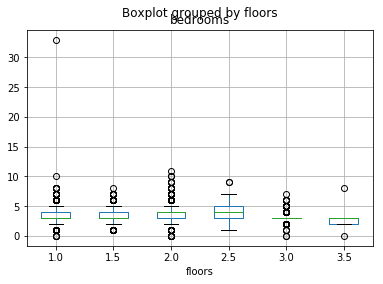

In [6]:
df.boxplot(column='bedrooms',by='floors')
plt.show()

In [7]:
def cast(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj

df['bathrooms'] = df['bathrooms'].apply(lambda x: cast(x))
df['floors'] = df['floors'].apply(lambda x: cast(x))

numerical = [i for i in df.columns if df[i].dtype.name != 'object']
categorial = [i for i in df.columns if df[i].dtype.name == 'object']

print('Числовые столбцы: ', numerical)
print('\n')
print('Категориальные стобцы: ', categorial)

Числовые столбцы:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Категориальные стобцы:  ['date']


In [8]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,0.026467,20140521T000000,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.0,0.947826,0.0,0.515152,0.874055,0.143688,0.194631,0.000986
21609,0.666639,20150223T000000,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.0,0.991304,0.0,0.732323,0.570693,0.130399,0.246257,0.007523
21610,0.153783,20140623T000000,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.0,0.947826,0.0,0.722222,0.705324,0.182724,0.106866,0.001558
21611,0.029327,20150116T000000,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.0,0.904348,0.0,0.131313,0.608975,0.373754,0.173980,0.000731
21612,0.153783,20141015T000000,0.032787,0.060606,0.09375,0.055094,0.000337,0.4,0.0,0.0,...,0.500000,0.080044,0.0,0.939130,0.0,0.722222,0.704842,0.182724,0.106866,0.000811


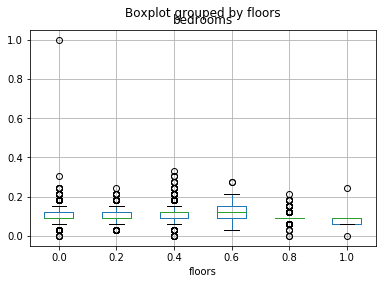

In [9]:
df.boxplot(column='bedrooms',by='floors')
plt.show()

Задание №4 не нуждается в выполнении, так как категориальных признаков нет

# 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

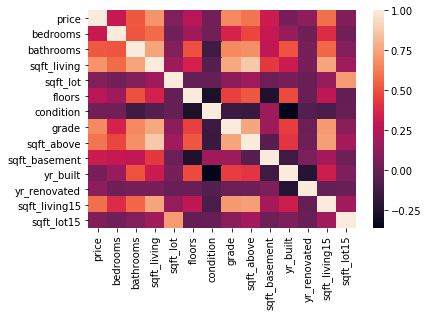

In [10]:
matrix = df.drop(['id','date','waterfront','view','zipcode','lat','long'], axis=1).corr()
sns.heatmap(matrix);
plt.show()

# 6. Заполните пропущенные значения в данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null float64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null float64
view             21613 non-null float64
condition        21613 non-null float64
grade            21613 non-null float64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null float64
yr_built         21613 non-null float64
yr_renovated     21613 non-null float64
zipcode          21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.6+ MB

Задание №6 не нуждается в выполнении, т.к. пропусков нет

# 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value

In [18]:
from  sklearn import linear_model
# линейная регрессия, LASSO регуляризатор.
X, y = df.drop(['price','date' ], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
reg.coef_

array([-0.00194496, -0.14592851,  0.04155688,  0.11204693,  0.03233074,
        0.00104583,  0.08272934,  0.02706334,  0.01346456,  0.1589406 ,
        0.13549138,  0.05164739, -0.04000652,  0.00515634, -0.01487619,
        0.04888636, -0.03401542,  0.01486874, -0.04690618])

In [20]:
xt = reg.predict(X_test)
print(xt[:10])

[ 0.07398148  0.05218968  0.11282452  0.151471    0.02061964  0.02314906
  0.07292981  0.05154239  0.07636773  0.07936546]


In [21]:
print(y_test[:10])

5506     0.060000
9279     0.043934
16034    0.092787
6608     0.120656
20359    0.026754
8798     0.013115
10035    0.080525
13321    0.026230
15842    0.051148
12119    0.056525
Name: price, dtype: float64


In [22]:
print(xt[:10]-y_test[:10])

5506     0.000877
9279     0.016942
16034   -0.031910
6608    -0.059779
20359    0.034122
8798     0.047762
10035   -0.019648
13321    0.034647
15842    0.009729
12119    0.004352
Name: price, dtype: float64


In [23]:
reg.intercept_

0.060876548485212963

In [24]:
from  sklearn import linear_model
# линейная регрессия без использования регуляризаторов;

X, y = df.drop(['price','date' ], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
reg.coef_

array([-0.00194496, -0.14592851,  0.04155688,  0.11204693,  0.03233074,
        0.00104583,  0.08272934,  0.02706334,  0.01346456,  0.1589406 ,
        0.13549138,  0.05164739, -0.04000652,  0.00515634, -0.01487619,
        0.04888636, -0.03401542,  0.01486874, -0.04690618])

In [27]:
reg.intercept_

-0.069888631570251242

In [40]:
from scipy.stats import *
corr={}
corr['pearson'], _ = stats.pearsonr(xt,y_test)
corr['spearman'], _ = stats.spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.842546235705
0.857561448278
